In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import plotly.express as px


# to read the file

In [2]:
df = pd.read_csv(r"C:\Users\HP Notebook\Desktop\airbnb data\Airbnb_data.csv")


# checking null

In [3]:
pd.notnull(df["reviews_per_month"])

0         True
1         True
2        False
3         True
4         True
         ...  
48890    False
48891    False
48892    False
48893    False
48894    False
Name: reviews_per_month, Length: 48895, dtype: bool

In [4]:
df['last_review']=pd.to_datetime(df['last_review'])
#df['review_date']=pd.to_datetime(df['review_date'])

In [5]:

df.shape

(48895, 16)

In [6]:
df.describe()

id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   

       minimum_nights  number_of_reviews                    last_review  \
count    48895.000000       48895.000000                          38843   
mean         7.029962          23.274466  2018-10-04 01:47:23.910099456   
min          1.000000           0.000000            2011-03-28 00:00:00   
25%          1.000000           1.000000            2018-07-08 00:00:00   
50%          3.000000           5.000000            2019-05-19 00:00:00   
75%          5.000000          24.000000            2019-06-23 00:00:00   
max       1250.000000         629.000000            2019-07-08 00:00:00   
std         20.510550          44.550582                            NaN   

       reviews_per_month  calculated_host_listings_count  availability_365  
count       38843.000000                    48895.000000      48895.000000  
mean            1.373221                        7.143982        112.781327  
min             0.010000                        1.000000          0.000000  
25%             0.190000                        1.000000          0.000000  
50%             0.720000                        1.000000         45.000000  
75%             2.020000                        2.000000        227.000000  
max            58.500000                      327.000000        365.000000  
std             1.680442                       32.952519        131.622289

In [20]:
df

id                                               name   host_id  \
0          2539                 Clean & quiet apt home by the park      2787   
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

           host_name neighbourhood_group       neighbourhood  latitude  \
0               John            Brooklyn          Kensington  40.64749   
1           Jennifer           Manhattan             Midtown  40.75362   
2          Elisabeth           Manhattan              Harlem  40.80902   
3        LisaRoxanne            Brooklyn        Clinton Hill  40.68514   
4              Laura           Manhattan         East Harlem  40.79851   
...              ...                 ...                 ...       ...   
48890        Sabrina            Brooklyn  Bedford-Stuyvesant  40.67853   
48891        Marisol            Brooklyn            Bushwick  40.70184   
48892  Ilgar & Aysel           Manhattan              Harlem  40.81475   
48893            Taz           Manhattan      Hell's Kitchen  40.75751   
48894     Christophe           Manhattan      Hell's Kitchen  40.76404   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0      -73.97237     Private room    149               1                  9   
1      -73.98377  Entire home/apt    225               1                 45   
2      -73.94190     Private room    150               3                  0   
3      -73.95976  Entire home/apt     89               1                270   
4      -73.94399  Entire home/apt     80              10                  9   
...          ...              ...    ...             ...                ...   
48890  -73.94995     Private room     70               2                  0   
48891  -73.93317     Private room     40               4                  0   
48892  -73.94867  Entire home/apt    115              10                  0   
48893  -73.99112      Shared room     55               1                  0   
48894  -73.98933     Private room     90               7                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
0      2018-10-19               0.21                               6   
1      2019-05-21               0.38                               2   
2             NaT                NaN                               1   
3      2019-07-05               4.64                               1   
4      2018-11-19               0.10                               1   
...           ...                ...                             ...   
48890         NaT                NaN                               2   
48891         NaT                NaN                               2   
48892         NaT                NaN                               1   
48893         NaT                NaN                               6   
48894         NaT                NaN                               1   

       availability_365  
0                   365  
1                   355  
2                   365  
3                   194  
4                     0  
...                 ...  
48890                 9  
48891                36  
48892                27  
48893                 2  
48894                23  

[48895 rows x 16 columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48895 non-null  int64         
 1   name                            48879 non-null  object        
 2   host_id                         48895 non-null  int64         
 3   host_name                       48874 non-null  object        
 4   neighbourhood_group             48895 non-null  object        
 5   neighbourhood                   48895 non-null  object        
 6   latitude                        48895 non-null  float64       
 7   longitude                       48895 non-null  float64       
 8   room_type                       48895 non-null  object        
 9   price                           48895 non-null  int64         
 10  minimum_nights                  48895 non-null  int64         
 11  nu

In [8]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [9]:
df.dropna(inplace=True)  # Drops rows with missing values
df = df[(df != 0).any(axis=1)]

In [10]:

df.describe()

id       host_id      latitude     longitude         price  \
count  3.882100e+04  3.882100e+04  38821.000000  38821.000000  38821.000000   
mean   1.810081e+07  6.424582e+07     40.728129    -73.951149    142.332526   
min    2.539000e+03  2.438000e+03     40.506410    -74.244420      0.000000   
25%    8.721444e+06  7.029525e+06     40.688640    -73.982460     69.000000   
50%    1.887286e+07  2.837092e+07     40.721710    -73.954810    101.000000   
75%    2.756746e+07  1.018905e+08     40.762990    -73.935020    170.000000   
max    3.645581e+07  2.738417e+08     40.913060    -73.712990  10000.000000   
std    1.069372e+07  7.589752e+07      0.054991      0.046693    196.994756   

       minimum_nights  number_of_reviews                    last_review  \
count    38821.000000       38821.000000                          38821   
mean         5.869220          29.290255  2018-10-04 07:23:47.072975872   
min          1.000000           1.000000            2011-03-28 00:00:00   
25%          1.000000           3.000000            2018-07-09 00:00:00   
50%          2.000000           9.000000            2019-05-19 00:00:00   
75%          4.000000          33.000000            2019-06-23 00:00:00   
max       1250.000000         629.000000            2019-07-08 00:00:00   
std         17.389026          48.182900                            NaN   

       reviews_per_month  calculated_host_listings_count  availability_365  
count       38821.000000                    38821.000000      38821.000000  
mean            1.373229                        5.166611        114.886299  
min             0.010000                        1.000000          0.000000  
25%             0.190000                        1.000000          0.000000  
50%             0.720000                        1.000000         55.000000  
75%             2.020000                        2.000000        229.000000  
max            58.500000                      327.000000        365.000000  
std             1.680328                       26.302954        129.529950

# Number of Distict neighbouhood_group


In [11]:
df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   
5  5099         Large Cozy 1 BR Apartment In Midtown East     7322   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   
5        Chris           Manhattan   Murray Hill  40.74767  -73.97500   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   
5  Entire home/apt    200               3                 74  2019-06-22   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
3               4.64                               1               194  
4               0.10                               1                 0  
5               0.59                               1               129

In [12]:
# Assigning variable
region = df.loc[:, 'neighbourhood_group']

# Extracting unique values from the variable
unique_regions = pd.unique(region)
No_of_unique_regions=len(unique_regions)
print("Unique regions are",unique_regions)
print('Number of distinct regions:', No_of_unique_regions)

Unique regions are ['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']
Number of distinct regions: 5


In [13]:
count_by_region=df['neighbourhood_group'].value_counts()
print(count_by_region)

neighbourhood_group
Manhattan        16621
Brooklyn         16439
Queens            4572
Bronx              875
Staten Island      314
Name: count, dtype: int64





# Calculating percentage of properties by region

In [14]:
percent_by_region=round(df['neighbourhood_group'].value_counts(normalize=True)*100,2)
print(percent_by_region)

neighbourhood_group
Manhattan        42.81
Brooklyn         42.35
Queens           11.78
Bronx             2.25
Staten Island     0.81
Name: proportion, dtype: float64


In [15]:
median_price_groups=df.groupby('neighbourhood_group')['price'].median()
print(median_price_groups)

neighbourhood_group
Bronx             65.0
Brooklyn          94.0
Manhattan        140.0
Queens            72.0
Staten Island     75.0
Name: price, dtype: float64


# Creating Donut Chart for percentage of properties by region

In [16]:
import plotly.graph_objects as go
# Creating the donut chart
fig = go.Figure(data=[go.Pie(labels=percent_by_region.index, values=percent_by_region, hole=.3)])

# Updating the chart's appearance
fig.update_traces(textinfo='percent+label', marker=dict(colors=['#636EFA','#EF553B','#00CC96','#AB63FA','#FFA15A'], line=dict(color='#FFFFFF', width=2)))

# Updating the layout
fig.update_layout(showlegend=False)

# Displaying the chart
fig.show()


# Count of room_type in each neighbourhood

In [17]:
counts_rm_tpe = df.groupby('neighbourhood_group')['room_type'].value_counts().unstack()
print(counts_rm_tpe)


room_type            Entire home/apt  Private room  Shared room
neighbourhood_group                                            
Bronx                            308           524           43
Brooklyn                        8159          7990          290
Manhattan                       9962          6303          356
Queens                          1742          2678          152
Staten Island                    150           159            5


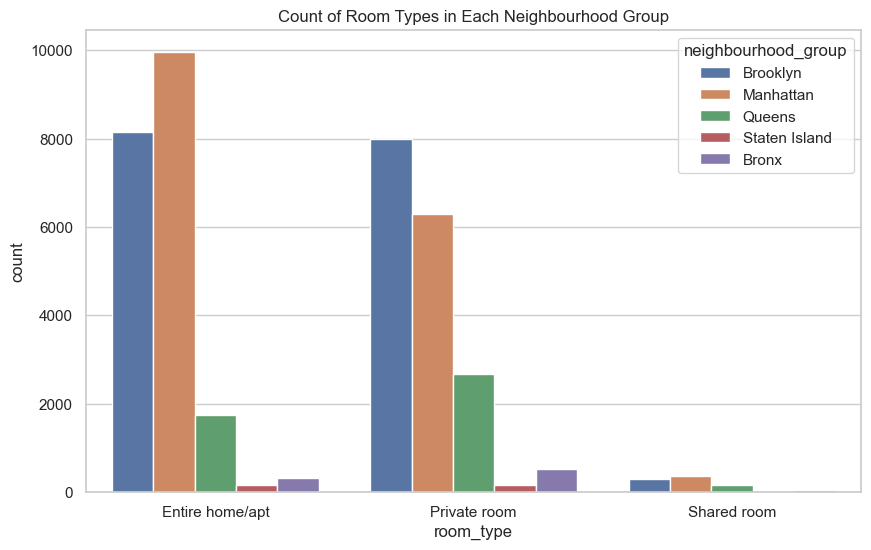

In [18]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Creating the countplot with 'room_type' on the x-axis and 'neighbourhood_group' as hue
sns.countplot(x='room_type', hue='neighbourhood_group', data=df,order=df['room_type'].value_counts().index)

# Adding a title to the plot
plt.title('Count of Room Types in Each Neighbourhood Group')

# Display the plot
plt.show()

<Figure size 1200x800 with 0 Axes>

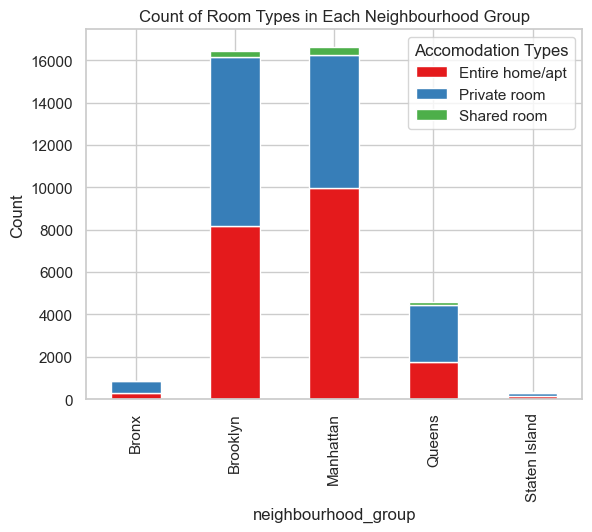

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Set the style
sns.set(style="whitegrid")

# Create a contingency table using pd.crosstab
contingency_table = pd.crosstab(df['neighbourhood_group'], df['room_type'])

# Set a custom color palette for better visualization
custom_palette = sns.color_palette("Set1")

# Create the stacked bar chart
plt.figure(figsize=(12, 8))
contingency_table.plot(kind="bar", stacked=True, color=custom_palette)

# Adding a title to the plot
plt.title('Count of Room Types in Each Neighbourhood Group')

# Adding labels to axes
plt.xlabel('neighbourhood_group')
plt.ylabel('Count')

# Adding legend
plt.legend(title='Accomodation Types')

# Display the plot
plt.show()


<Figure size 2000x1500 with 0 Axes>

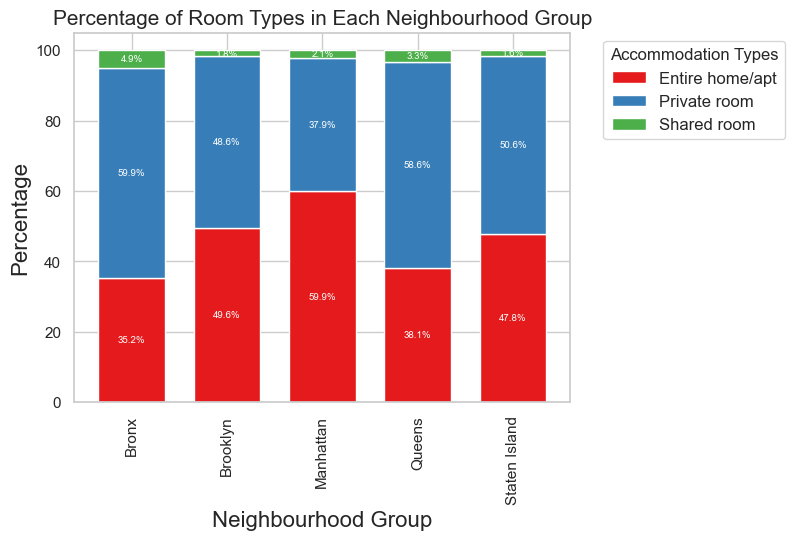

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Set the style
sns.set(style="whitegrid")

# Create a contingency table using pd.crosstab
contingency_table = pd.crosstab(df['neighbourhood_group'], df['room_type'], normalize='index') * 100

# Set a custom color palette for better visualization
custom_palette = sns.color_palette("Set1")

# Create the stacked bar chart with a larger figure size and increased bar size
plt.figure(figsize=(20, 15))
bars = contingency_table.plot(kind="bar", stacked=True, color=custom_palette, width=0.7)  # Adjust the width as needed

# Adding a title to the plot
plt.title('Percentage of Room Types in Each Neighbourhood Group', fontsize=15)

# Adding labels to axes with larger font size
plt.xlabel('Neighbourhood Group', fontsize=16)
plt.ylabel('Percentage', fontsize=16)

# Add percentage labels on top of the bars with larger font size
for bar in bars.patches:
    width = bar.get_width()
    height = bar.get_height()
    x, y = bar.get_xy() 
    plt.text(x + width / 2, y + height / 2, f'{height:.1f}%', 
             ha='center', va='center', color='white', fontsize=7)

# Move the legend outside the plot
plt.legend(title='Accommodation Types', fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()


# Group by neighbourhood_group and calculate the mean price for each group

In [21]:

neighborhood_group_stats = df.groupby('neighbourhood_group')['price'].mean()
print(neighborhood_group_stats)

neighbourhood_group
Bronx             79.558857
Brooklyn         121.463289
Manhattan        180.071596
Queens            95.783683
Staten Island     89.964968
Name: price, dtype: float64


# Comparing the distribution of prices across different neighborhood groups and ouliers detection


In [22]:
plt.figure(figsize = (15,5))
sns.boxplot(y = "neighbourhood_group", x = "price", data = df, palette="Set2")

C:\Users\HP Notebook\AppData\Local\Temp\ipykernel_9328\466170440.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='price', ylabel='neighbourhood_group'>

# Box Plot for the prices and outliers

In [23]:
df=df[df.price<2000]

In [8]:
plt.figure(figsize = (15,5))
sns.boxplot(y = "neighbourhood_group", x = "price", data = df, palette="Set2")

C:\Users\HP Notebook\AppData\Local\Temp\ipykernel_848\466170440.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y = "neighbourhood_group", x = "price", data = df, palette="Set2")


<Axes: xlabel='price', ylabel='neighbourhood_group'>

In [24]:
quartiles_iqr = df.groupby('neighbourhood_group')['price'].describe(percentiles=[.25, .5, .75]).reset_index()

# Calculate IQR
quartiles_iqr['IQR'] = quartiles_iqr['75%'] - quartiles_iqr['25%']

# Display the result
print(quartiles_iqr[['neighbourhood_group', '25%', '50%', '75%', 'IQR']])

  neighbourhood_group   25%    50%    75%    IQR
0               Bronx  45.0   65.0   95.0   50.0
1            Brooklyn  60.0   94.0  149.5   89.5
2           Manhattan  90.0  140.0  200.0  110.0
3              Queens  50.0   72.0  109.0   59.0
4       Staten Island  50.0   75.0  105.0   55.0


In [25]:
fd = df[(df['price'] > 0) &(df['minimum_nights'] < 30)]

# Statistical Summary or proces across neighbourhood_group

In [26]:
quartiles_iqr = fd.groupby('neighbourhood_group')['price'].describe(percentiles=[.25, .5, .75]).reset_index()

quartiles_iqr['IQR'] = quartiles_iqr['75%'] - quartiles_iqr['25%']

result_df = quartiles_iqr[['neighbourhood_group','min','max','25%', '50%', '75%','IQR']]
print(result_df)

  neighbourhood_group   min     max   25%    50%    75%    IQR
0               Bronx  20.0   800.0  45.0   65.0   95.0   50.0
1            Brooklyn  10.0  1750.0  60.0   94.0  150.0   90.0
2           Manhattan  10.0  1999.0  90.0  140.0  200.0  110.0
3              Queens  10.0  1800.0  51.0   75.0  110.0   59.0
4       Staten Island  13.0   625.0  50.0   72.0  105.0   55.0


# Most reviewd room types


In [44]:



# Step 1: Find the most reviewed room types in each neighbourhood_group
most_reviewed_types = df.groupby(['neighbourhood_group', 'room_type'])['reviews_per_month'].mean().reset_index()
most_reviewed_types = most_reviewed_types.loc[most_reviewed_types.groupby('neighbourhood_group')['reviews_per_month'].idxmax()]

# Step 2: Display the numerical values
for _, row in most_reviewed_types.iterrows():
    print(f"Neighbourhood Group: {row['neighbourhood_group']}, Room Type: {row['room_type']}, Average Reviews per Month: {row['reviews_per_month']:.2f}")

# Output the most reviewed room types in each neighbourhood_group




Neighbourhood Group: Bronx, Room Type: Entire home/apt, Average Reviews per Month: 2.24
Neighbourhood Group: Brooklyn, Room Type: Entire home/apt, Average Reviews per Month: 1.32
Neighbourhood Group: Manhattan, Room Type: Shared room, Average Reviews per Month: 1.79
Neighbourhood Group: Queens, Room Type: Entire home/apt, Average Reviews per Month: 1.97
Neighbourhood Group: Staten Island, Room Type: Entire home/apt, Average Reviews per Month: 2.07


(array([3.1907e+04, 5.6540e+03, 7.6400e+02, 2.4600e+02, 1.1300e+02,
        5.1000e+01, 1.4000e+01, 1.6000e+01, 3.0000e+00, 3.0000e+00]),
 array([   0. ,  199.9,  399.8,  599.7,  799.6,  999.5, 1199.4, 1399.3,
        1599.2, 1799.1, 1999. ]),
 <BarContainer object of 10 artists>)

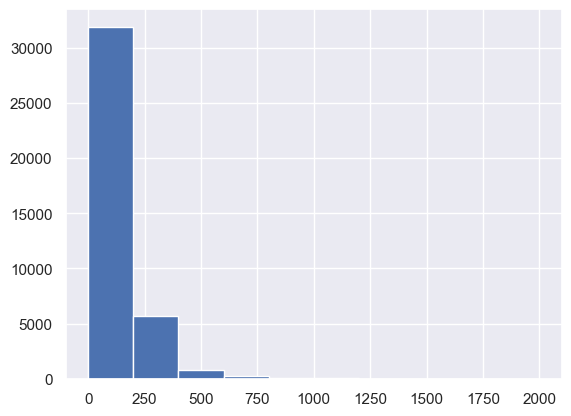

In [28]:
plt.hist(df.price)

In [33]:
df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   
5  5099         Large Cozy 1 BR Apartment In Midtown East     7322   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   
5        Chris           Manhattan   Murray Hill  40.74767  -73.97500   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   
5  Entire home/apt    200               3                 74  2019-06-22   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
3               4.64                               1               194  
4               0.10                               1                 0  
5               0.59                               1               129

In [34]:
df.shape

(38771, 16)

In [35]:

df[df.price>1000].shape

(57, 16)


# Bar chart of avg price by neighbourhood group

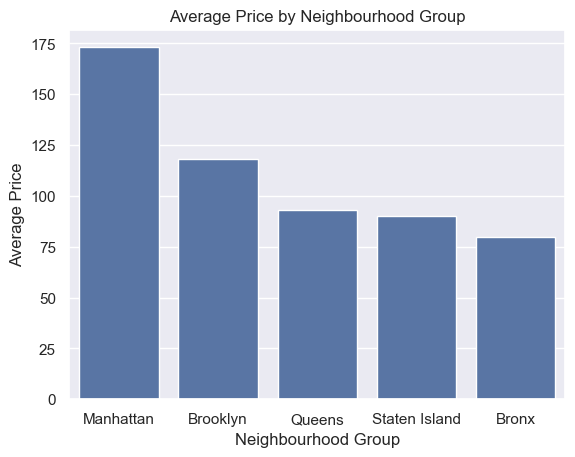

In [29]:
neighbourhood_group_stats = df.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=False)

# Bar chart for neighbourhood_group analysis
sns.barplot(x=neighbourhood_group_stats.index, y=neighbourhood_group_stats.values)
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Price')
plt.title('Average Price by Neighbourhood Group')
plt.show()



C:\Users\HP Notebook\AppData\Local\Temp\ipykernel_9328\2486338119.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




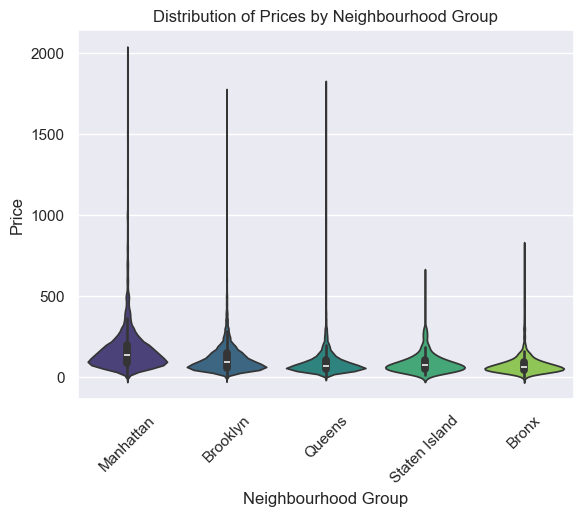

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already calculated neighbourhood_group_stats as mentioned in your code

# Violin plot for neighbourhood_group analysis
sns.violinplot(x=df['neighbourhood_group'], y=df['price'], order=neighbourhood_group_stats.index, palette='viridis')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Price')
plt.title('Distribution of Prices by Neighbourhood Group')
plt.xticks(rotation=45)
plt.show()


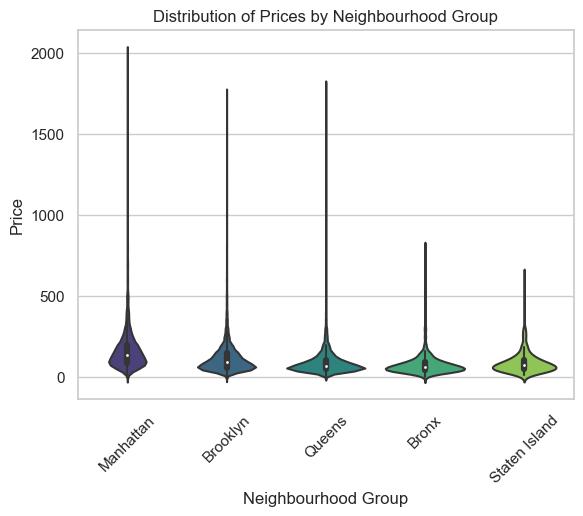

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'neighbourhood_group' is a column in your DataFrame
sns.violinplot(x=df['neighbourhood_group'], y=df['price'], order=df['neighbourhood_group'].value_counts().index, palette='viridis')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Price')
plt.title('Distribution of Prices by Neighbourhood Group')
plt.xticks(rotation=45)
plt.show()


# Density and distribution of prices for each neighbourhood_group

Text(0.5, 1.0, 'Density and distribution of prices for each neighberhood_group')

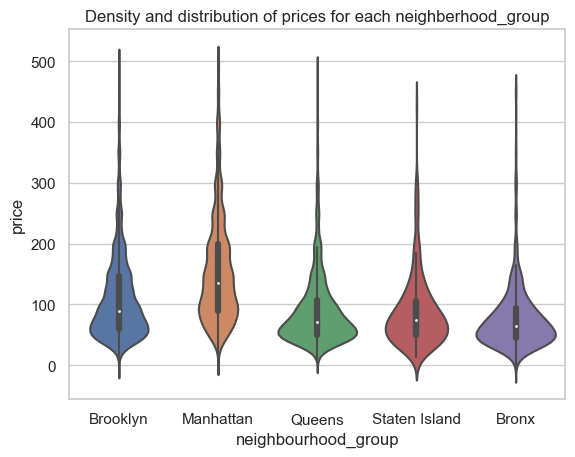

In [39]:
#we can see from our statistical table that we have some extreme values, therefore we need to remove them for the sake of a better visualization

#creating a sub-dataframe with no extreme values / less than 500
sub_6=df[df.price < 500]
#using violinplot to showcase density and distribtuion of prices 
viz_2=sns.violinplot(data=sub_6, x='neighbourhood_group', y='price')
viz_2.set_title('Density and distribution of prices for each neighberhood_group')

Great, with a statistical table and a violin plot we can definitely observe a couple of things about distribution of prices for Airbnb in NYC boroughs. First, we can state that Manhattan has the highest range of prices for the listings with $150 price as average observation, followed by Brooklyn with \$90 per night. Queens and Staten Island appear to have very similar distributions, Bronx is the cheapest of them all. This distribution and density of prices were completely expected; for example, as it is no secret that Manhattan is one of the most expensive places in the world to live in, where Bronx on other hand appears to have lower standards of living.

Let's interpret the violin plot results in terms of mean prices for each borough:

Manhattan:

The dark blue violin plot indicates a concentration of prices at both lower and higher ends.
The wider spread suggests a broader range of prices.
The mean price appears to be relatively high, as indicated by the concentration at the higher end.
Brooklyn:

The lighter blue violin plot shows most prices concentrated at the lower end but extends up to mid-range.
The mean price is likely lower than Manhattan but higher than some other boroughs.
Queens:

The teal violin plot suggests most prices are concentrated at the lower end.
The mean price is expected to be lower compared to Manhattan and potentially lower than Brooklyn.
Staten Island:

The green violin plot indicates almost all prices are concentrated at the lower end.
The mean price is likely to be on the lower side compared to the other boroughs.
Bronx:

The darker green violin plot shows most prices concentrated at the lower end.
The mean price is expected to be relatively low, possibly the lowest among the boroughs.
In summary, the violin plot helps visualize the distribution of prices within each borough, and by considering the shape and spread of each violin, you can make observations about the mean prices in relation to the concentration and range of prices in each borough. This type of visualization is useful for understanding the central tendency and variability of prices across different categories.

# Top 5 Neighborhoods with Highest Average Prices in Each Neighbourhood Group

In [35]:
grouped_neighborhoods = df.groupby(['neighbourhood_group', 'neighbourhood'])['price'].mean().reset_index()

# Sorting the DataFrame by average price in descending order
sorted_neighborhoods = grouped_neighborhoods.sort_values(by=['neighbourhood_group', 'price'], ascending=[True,False])

# Getting the top 5 neighborhoods for each neighbourhood_group
top_neighborhoods = sorted_neighborhoods.groupby('neighbourhood_group').head(5)

# Displaying the top 5 neighborhoods in each neighbourhood_group
print(top_neighborhoods)

    neighbourhood_group       neighbourhood       price
34                Bronx           Riverdale  226.857143
40                Bronx           Unionport  162.000000
37                Bronx      Spuyten Duyvil  154.750000
45                Bronx  Westchester Square  127.444444
12                Bronx         Eastchester  124.900000
88             Brooklyn            Sea Gate  482.500000
56             Brooklyn    Brooklyn Heights  201.959677
62             Brooklyn         Cobble Hill  193.431818
82             Brooklyn          Mill Basin  179.750000
60             Brooklyn     Carroll Gardens  178.898990
121           Manhattan             Tribeca  352.644860
115           Manhattan                NoHo  298.451613
102           Manhattan   Flatiron District  291.482759
118           Manhattan                SoHo  257.866197
112           Manhattan             Midtown  256.860489
163              Queens            Neponsit  274.666667
134              Queens        Breezy Point  195

In [18]:
#Create list of rank for AirBnb room
rank_room = ["Budget", "Average", "Expensive", "Luxury", "Presidential"]

#Create the range
ranges = [0, 100, 200, 400, 1000, np.inf]

#Input new column for price_range
df["ranges"] = pd.cut(df["price"], bins=ranges, labels=rank_room)

#Categorize room in different price ranges in boroughs of NY
room_by_price_range = df.groupby(["ranges", "neighbourhood_group"])["price"].count()
print(room_by_price_range)

ranges        neighbourhood_group
Budget        Bronx                   711
              Brooklyn               9515
              Manhattan              5559
              Queens                 3361
              Staten Island           232
Average       Bronx                   137
              Brooklyn               5305
              Manhattan              7058
              Queens                  977
              Staten Island            67
Expensive     Bronx                    20
              Brooklyn               1333
              Manhattan              3199
              Queens                  208
              Staten Island            13
Luxury        Bronx                     6
              Brooklyn                254
              Manhattan               725
              Queens                   22
              Staten Island             2
Presidential  Bronx                     0
              Brooklyn                 23
              Manhattan                80


In [36]:
import pandas as pd
import numpy as np

# Assuming df is your DataFrame with the necessary columns
# For example:
# df = pd.DataFrame({"price": [80, 150, 220, 300, 500, 1200],
#                    "neighbourhood_group": ["Manhattan", "Brooklyn", "Manhattan", "Queens", "Brooklyn", "Manhattan"]})

# Create list of rank for AirBnb room
rank_room = ["Budget", "Average", "Expensive", "Luxury", "Presidential"]

# Create the range
ranges = [0, 100, 200, 400, 1000, np.inf]

# Input new column for price_range
df["ranges"] = pd.cut(df["price"], bins=ranges, labels=rank_room)

# Categorize room in different price ranges in boroughs of NY
room_by_price_range = df.groupby(["ranges", "neighbourhood_group"])["price"].count()

# Convert the result to a DataFrame and unstack
result_df = room_by_price_range.reset_index().pivot(index='neighbourhood_group', columns='ranges', values='price')

# Fill NaN values with 0
result_df = result_df.fillna(0).astype(int)

# Display the result as a table
print(result_df)


ranges               Budget  Average  Expensive  Luxury  Presidential
neighbourhood_group                                                  
Bronx                   711      137         20       6             0
Brooklyn               9515     5305       1333     254            11
Manhattan              5559     7058       3199     725            44
Queens                 3361      977        208      22             2
Staten Island           232       67         13       2             0


C:\Users\HP Notebook\AppData\Local\Temp\ipykernel_9328\3314922352.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample data
data = {'Budget': [711, 9515, 5559, 3361, 232],
        'Average': [137, 5305, 7058, 977, 67],
        'Expensive': [20, 1333, 3199, 208, 13],
        'Luxury': [6, 254, 725, 22, 2],
        'Presidential': [0, 23, 80, 4, 0]}

# Create a DataFrame
result_df = pd.DataFrame(data, index=['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'])

# Plotting
fig, ax = plt.subplots(figsize=(16, 10))

# Stacked bar chart
bars = result_df.plot(kind='bar', stacked=True, ax=ax)

# Adding labels on top of the bars
for bar in bars.patches:
    width = bar.get_width()
    height = bar.get_height()
    x, y = bar.get_xy() 
    ax.text(x + width / 2, y + height / 2, int(height), 
            ha='center', va='center', color='white', fontsize=12)

ax.set_xlabel('Neighbourhood Group')
ax.set_ylabel('Number of Listings')
ax.legend(title='Room Rank', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_title('Number of Listings in Each Neighbourhood Group by Room Rank')

plt.show()


In [20]:
#Create plot for AirBnb room ranks

room_by_price_range = room_by_price_range.reset_index()
price_ranges = room_by_price_range['ranges'].unique()

fig, ax = plt.subplots()
for price_range in price_ranges:
    filtered_df = room_by_price_range[room_by_price_range['ranges'] == price_range]
    ax.bar(filtered_df['neighbourhood_group'], filtered_df['price'], label=price_range)

ax.set_xlabel('Neighbourhood_group')
ax.set_ylabel('Number of listings')
ax.legend()
ax.set_title('Number of listings in each neighbourhood group by price range')
plt.show()

# Plot the top 5 neighborhoods in each neighbourhood group

C:\Users\HP Notebook\AppData\Local\Temp\ipykernel_9328\3196378414.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



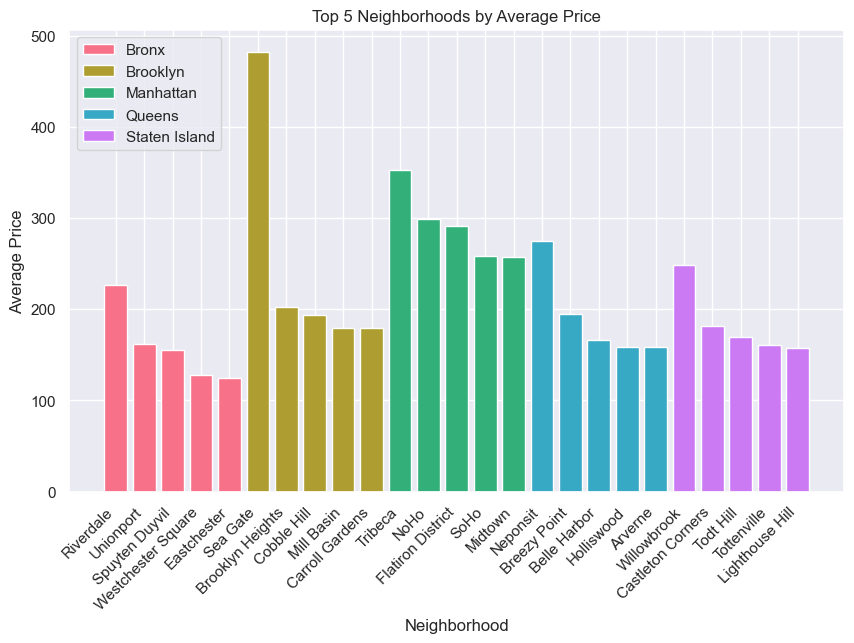

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns


neighbourhood_groups = top_neighborhoods['neighbourhood_group'].unique()

# Generating a color palette with a unique color for each neighbourhood group
palette = sns.color_palette("husl", n_colors=len(neighbourhood_groups))

# Creating a dictionary to map neighbourhood groups to colors
color_mapping = dict(zip(neighbourhood_groups, palette))

# Adding a 'color' column based on the 'neighbourhood_group' for each row
top_neighborhoods['color'] = top_neighborhoods['neighbourhood_group'].map(color_mapping)

plt.figure(figsize=(10, 6))
bars = plt.bar(top_neighborhoods['neighbourhood'], top_neighborhoods['price'], color=top_neighborhoods['color'])
plt.xlabel('Neighborhood')
plt.ylabel('Average Price')
plt.title('Top 5 Neighborhoods by Average Price')

# Adding a legend for neighbourhood groups
legend_labels = [plt.Rectangle((0, 0), 1, 1, fc=color_mapping[group]) for group in neighbourhood_groups]
plt.legend(legend_labels, neighbourhood_groups, loc='upper left')

plt.xticks(rotation=45, ha='right')
plt.show()


C:\Users\HP Notebook\AppData\Local\Temp\ipykernel_9328\1338044284.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



         neighbourhood neighbourhood_group       price
0             Sea Gate            Brooklyn  482.500000
1              Tribeca           Manhattan  352.644860
2                 NoHo           Manhattan  298.451613
3    Flatiron District           Manhattan  291.482759
4             Neponsit              Queens  274.666667
5                 SoHo           Manhattan  257.866197
6              Midtown           Manhattan  256.860489
7          Willowbrook       Staten Island  249.000000
8            Riverdale               Bronx  226.857143
9     Brooklyn Heights            Brooklyn  201.959677
10        Breezy Point              Queens  195.000000
11         Cobble Hill            Brooklyn  193.431818
12   Castleton Corners       Staten Island  182.000000
13          Mill Basin            Brooklyn  179.750000
14     Carroll Gardens            Brooklyn  178.898990
15           Todt Hill       Staten Island  169.000000
16        Belle Harbor              Queens  166.400000
17        

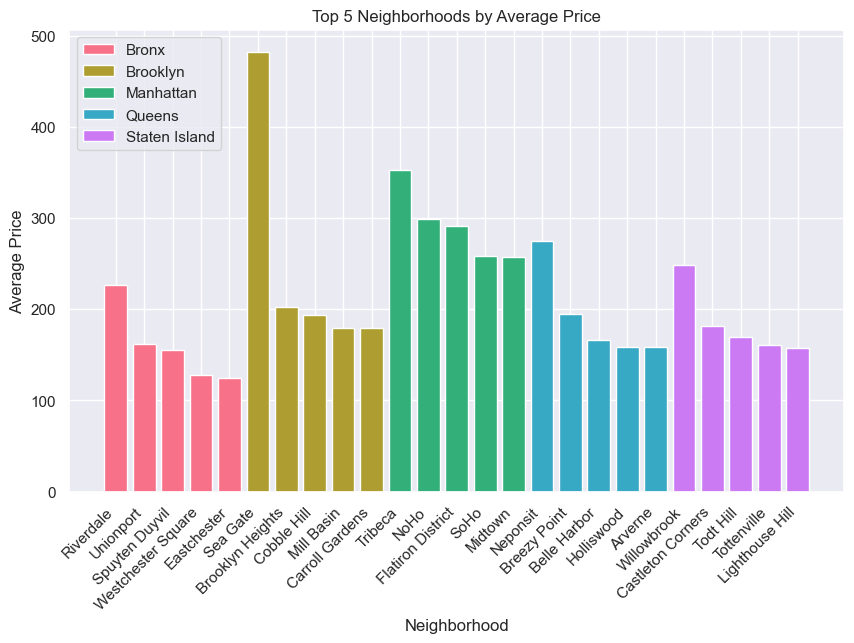

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming top_neighborhoods is a DataFrame containing the relevant data

neighbourhood_groups = top_neighborhoods['neighbourhood_group'].unique()

# Generating a color palette with a unique color for each neighbourhood group
palette = sns.color_palette("husl", n_colors=len(neighbourhood_groups))

# Creating a dictionary to map neighbourhood groups to colors
color_mapping = dict(zip(neighbourhood_groups, palette))

# Adding a 'color' column based on the 'neighbourhood_group' for each row
top_neighborhoods['color'] = top_neighborhoods['neighbourhood_group'].map(color_mapping)

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(top_neighborhoods['neighbourhood'], top_neighborhoods['price'], color=top_neighborhoods['color'])
plt.xlabel('Neighborhood')
plt.ylabel('Average Price')
plt.title('Top 5 Neighborhoods by Average Price')

# Adding a legend for neighbourhood groups
legend_labels = [plt.Rectangle((0, 0), 1, 1, fc=color_mapping[group]) for group in neighbourhood_groups]
plt.legend(legend_labels, neighbourhood_groups, loc='upper left')

plt.xticks(rotation=45, ha='right')

# Displaying the numeric information as a table
table_data = top_neighborhoods[['neighbourhood', 'neighbourhood_group', 'price']].sort_values(by='price', ascending=False)
table_data.reset_index(drop=True, inplace=True)
print(table_data)

plt.show()


# visualize the distribution of prices for each neighborhood_group where prices<=1000

C:\Users\HP Notebook\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



<Figure size 1200x800 with 0 Axes>

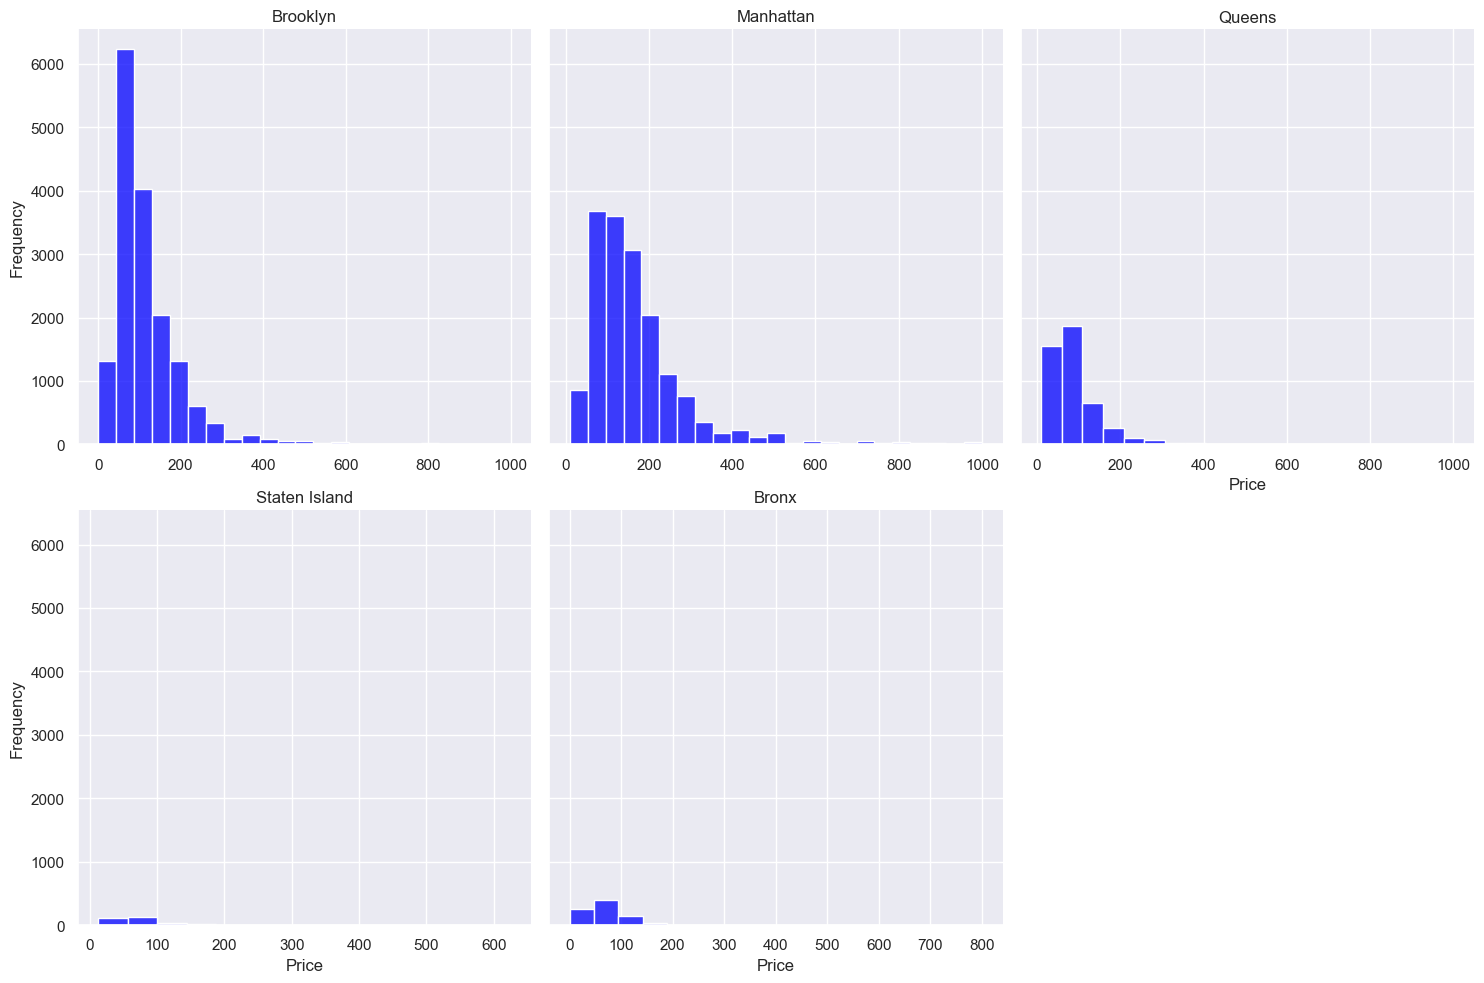

In [40]:

plt.figure(figsize=(12, 8))

# Filter the data for prices <= 1000
filtered_data = df[df['price'] <= 1000]

# Create a FacetGrid for each 'neighbourhood_group'
g = sns.FacetGrid(filtered_data, col='neighbourhood_group', col_wrap=3, height=5, sharex=False)

# Map the histogram for each 'neighbourhood_group'
g.map(sns.histplot, 'price', bins="doane", kde=False, color='blue')

# Set titles and labels
g.set_titles(col_template="{col_name}")
g.set_axis_labels('Price', 'Frequency')

# Show the plot
plt.show()


# room type with the highest maximum price in each neighborhood group. 

In [41]:
room_price_areawise = df.groupby(['neighbourhood_group', 'room_type'])['price'].max().reset_index()
room_price_areawise_sorted = room_price_areawise.sort_values(by='price', ascending=False).head()
room_price_areawise_sorted

neighbourhood_group        room_type  price
6            Manhattan  Entire home/apt   1999
11              Queens      Shared room   1800
3             Brooklyn  Entire home/apt   1750
7            Manhattan     Private room   1599
4             Brooklyn     Private room   1100

# Top Neighborhoods  of Neighbourhood_groups by Listing Count

In [42]:
neighborhood_listing_counts = df.groupby(['neighbourhood_group', 'neighbourhood']).size().reset_index(name='Listing Count')

# Sort the neighborhoods by listing count in descending order
top_neighborhoods = neighborhood_listing_counts.sort_values(by='Listing Count', ascending=False)

# Display the top neighborhoods with their neighborhood groups
print("Top Neighborhoods by Listing Count:")
print(top_neighborhoods.head())

Top Neighborhoods by Listing Count:
    neighbourhood_group       neighbourhood  Listing Count
93             Brooklyn        Williamsburg           3163
50             Brooklyn  Bedford-Stuyvesant           3138
105           Manhattan              Harlem           2202
58             Brooklyn            Bushwick           1941
106           Manhattan      Hell's Kitchen           1526


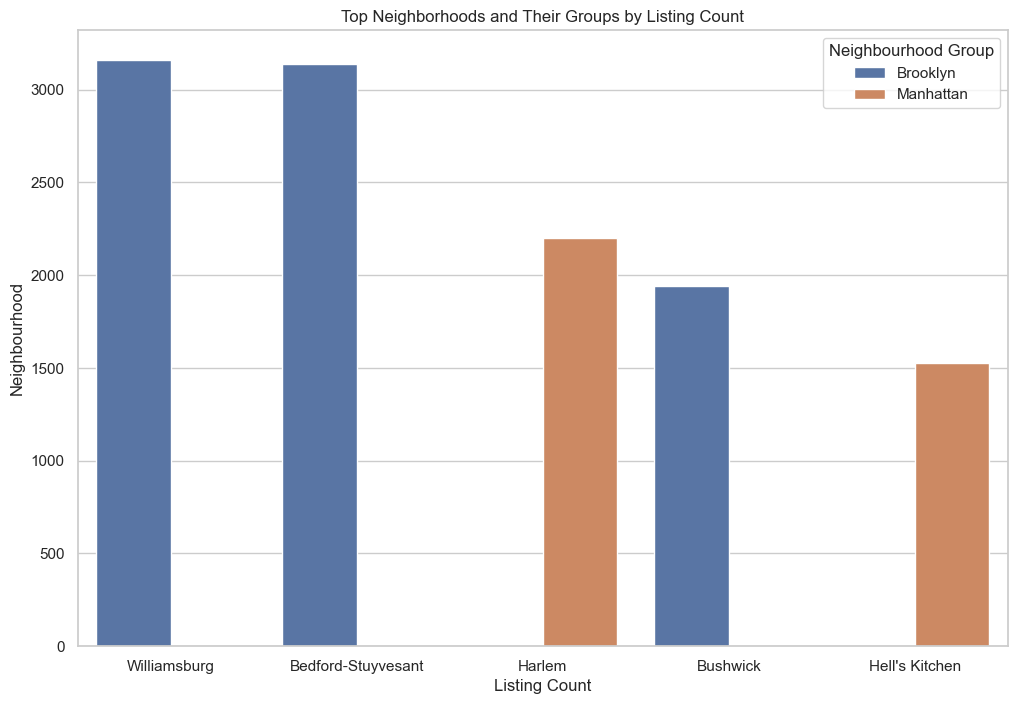

In [50]:




# Set the style for the plot
sns.set(style="whitegrid")

# Create a bar plot 
plt.figure(figsize=(12, 8))
sns.barplot(x='neighbourhood', y='Listing Count', hue='neighbourhood_group', data=top_neighborhoods.head(5))
plt.xlabel('Listing Count')
plt.ylabel('Neighbourhood')
plt.title('Top Neighborhoods and Their Groups by Listing Count')
plt.legend(title='Neighbourhood Group', loc='upper right')
plt.show()

# visualize the mean prices for different neighborhood groups and room types

<Axes: xlabel='room_type', ylabel='neighbourhood_group'>

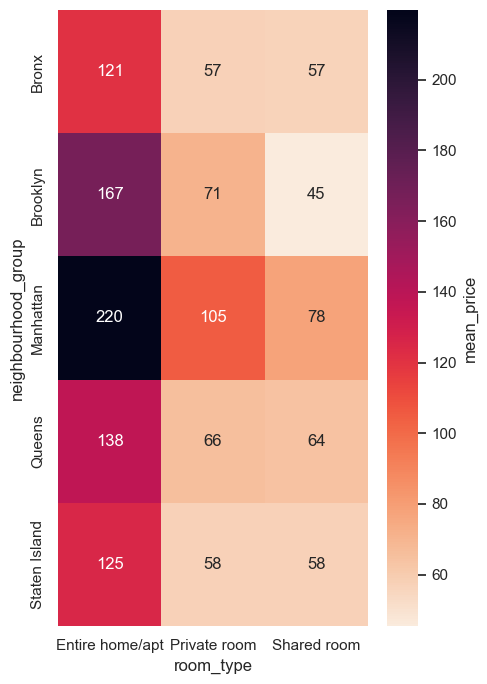

In [44]:
plt.figure(figsize = (5,8))
sns.heatmap(df.groupby(['neighbourhood_group','room_type']).price.mean().unstack(), annot=True, fmt=".0f", cmap = sns.cm.rocket_r, cbar_kws={'label': 'mean_price'})

# variation of prices across different neighbourhoods

In [45]:
price_variability = df.groupby('neighbourhood_group')['price'].std()

# Display the standard deviation of prices for each neighbourhood group
print("Price Variability Among Neighbourhood Groups:")
print(price_variability)

Price Variability Among Neighbourhood Groups:
neighbourhood_group
Bronx             63.999121
Brooklyn          95.500223
Manhattan        139.086242
Queens            74.297338
Staten Island     65.864044
Name: price, dtype: float64


# Which host in which neighbourhood has the most listings

In [46]:


host_areas = df.groupby(['host_name', 'neighbourhood_group'])['calculated_host_listings_count'].count().reset_index() 
top_hosts_areas = host_areas.sort_values(by='calculated_host_listings_count', ascending=False).head(5)
#print(host_areas)
print(top_hosts_areas)

          host_name neighbourhood_group  calculated_host_listings_count
11358  Sonder (NYC)           Manhattan                             207
8376        Michael           Manhattan                             176
2772          David           Manhattan                             148
5830           John           Manhattan                             127
8375        Michael            Brooklyn                             127


In [41]:




#mean_price = df['price'].mean()

#print("Mean Price:", mean_price)

# Confidence Intervals for the Mean Prices in Each Neighbourhood Group


In [42]:
neighbourhood_groups = df.groupby('neighbourhood_group')['price']

confidence_intervals = []

for group_name, group_prices in neighbourhood_groups:
    mean_price = group_prices.mean()
    std_dev_price = group_prices.std(ddof=1)
    std_error_price = std_dev_price / np.sqrt(len(group_prices))

    # Set the confidence level
    confidence_level_price = 0.95

    # Calculate the margin of error
    margin_of_error_price = stats.norm.ppf((1 + confidence_level_price) / 2) * std_error_price

    # Calculate the confidence interval
    confidence_interval_price = (mean_price - margin_of_error_price, mean_price + margin_of_error_price)

    confidence_intervals.append((group_name, confidence_interval_price))

# Print the confidence intervals
for group_name, interval in confidence_intervals:
    print(f"Neighbourhood Group: {group_name}, Confidence Interval: {interval}")

Neighbourhood Group: Bronx, Confidence Interval: (75.31834728696086, 83.79936699875344)
Neighbourhood Group: Brooklyn, Confidence Interval: (116.71302886241251, 119.63383909887075)
Neighbourhood Group: Manhattan, Confidence Interval: (170.99652098653888, 175.23006930589406)
Neighbourhood Group: Queens, Confidence Interval: (90.91440312468045, 95.22257718166527)
Neighbourhood Group: Staten Island, Confidence Interval: (82.6799329037316, 97.2500034020009)


# common room type among Airbnb listings

In [43]:

most_common_room_type_by_group = df.groupby('neighbourhood_group')['room_type'].apply(lambda x: x.mode().iloc[0]).reset_index()

for index, row in most_common_room_type_by_group.iterrows():
    neighbourhood_group = row['neighbourhood_group']
    most_common_room_type = row['room_type']
    print(f"The most common room type in {neighbourhood_group} is: {most_common_room_type}")


The most common room type in Bronx is: Private room
The most common room type in Brooklyn is: Entire home/apt
The most common room type in Manhattan is: Entire home/apt
The most common room type in Queens is: Private room
The most common room type in Staten Island is: Private room


# Minimum Nights(Range of accommodation options)

In [7]:
dff=df[df.minimum_nights<400]

In [8]:
minimum_nights = dff.loc[:, 'minimum_nights']
# highest requirement for staying in a property
max_minimum_nights = np.max(minimum_nights)
print('The maximum number of minimum nights for a single property is:', int(max_minimum_nights))
#the property with the least restrictive stay requirement
min_minimum_nights = np.min(minimum_nights)
print('The minimum number of minimum nights for a single property is:', int(min_minimum_nights))
average_minimum_nights  = np.mean(minimum_nights)
print('The average number of minimum nights for a single property is:', int(average_minimum_nights))
std_dev_minimum_nights  = np.std(minimum_nights)
print('The standard deviation of the number of minimum nights for a single property is:', int(std_dev_minimum_nights))


The maximum number of minimum nights for a single property is: 370
The minimum number of minimum nights for a single property is: 1
The average number of minimum nights for a single property is: 6
The standard deviation of the number of minimum nights for a single property is: 16


In [9]:
grouped_stats = dff.groupby('neighbourhood_group')['minimum_nights'].agg(['max', 'min', 'mean', 'std']).reset_index()

# Renaming the columns for clarity
grouped_stats.columns = ['neighbourhood_group', 'max_minimum_nights', 'min_minimum_nights', 'average_minimum_nights', 'std_dev_minimum_nights']
print(grouped_stats)

  neighbourhood_group  max_minimum_nights  min_minimum_nights  \
0               Bronx                 365                   1   
1            Brooklyn                 370                   1   
2           Manhattan                 366                   1   
3              Queens                 365                   1   
4       Staten Island                 365                   1   

   average_minimum_nights  std_dev_minimum_nights  
0                4.560953               15.631792  
1                5.913827               14.757142  
2                8.361886               18.979588  
3                5.010240               11.952636  
4                4.831099               19.727605  


# Number of Reviews by Room Type

In [47]:
reviews_by_room_type = df.groupby(['neighbourhood_group','room_type'])['number_of_reviews'].sum()

# Display the number of reviews by room type
print("Number of Reviews by Room Type:")
print(reviews_by_room_type)

Number of Reviews by Room Type:
neighbourhood_group  room_type      
Bronx                Entire home/apt     11590
                     Private room        16312
                     Shared room           432
Brooklyn             Entire home/apt    266706
                     Private room       213600
                     Shared room          5793
Manhattan            Entire home/apt    234635
                     Private room       208817
                     Shared room         10272
Queens               Entire home/apt     60641
                     Private room        93511
                     Shared room          2745
Staten Island        Entire home/apt      5857
                     Private room         5670
                     Shared room            14
Name: number_of_reviews, dtype: int64


In [47]:

df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   
5  5099         Large Cozy 1 BR Apartment In Midtown East     7322   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   
5        Chris           Manhattan   Murray Hill  40.74767  -73.97500   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   
5  Entire home/apt    200               3                 74  2019-06-22   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
3               4.64                               1               194  
4               0.10                               1                 0  
5               0.59                               1               129

# Number of Reviews by Room Type and Neighborhood Group



# The correlation between  availability_365 and price

In [49]:
correlation = df['availability_365'].corr(df['price'])

print(f"Correlation between Availability and Price: {correlation}")

Correlation between Availability and Price: 0.10701776196572595


# The correlation between variables

In [21]:
dff=df[df.price<500]
dff=df[df.minimum_nights<300]

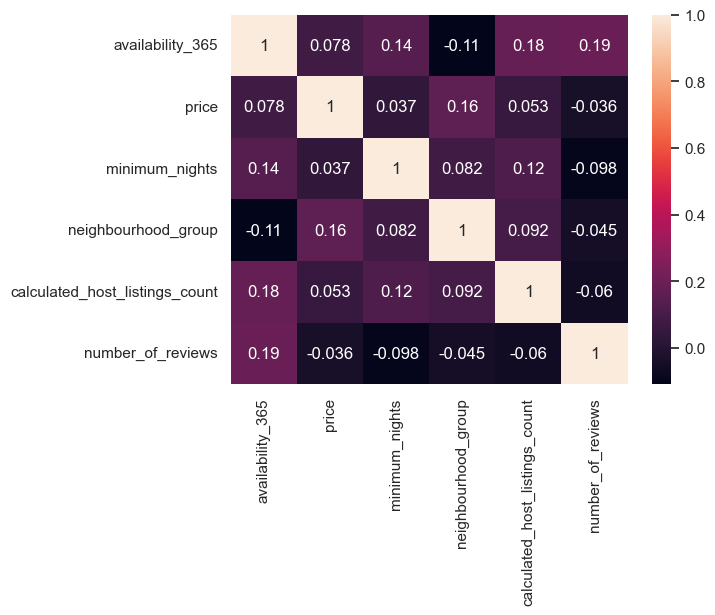

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

labels = {'Staten Island': 0, 'Bronx': 1, 'Queens': 2, 'Brooklyn': 3, 'Manhattan': 4}

# Use .loc for assignment
dff.loc[:, 'neighbourhood_group'] = dff['neighbourhood_group'].replace(labels)

# Now you can create the heatmap
viz = sns.heatmap(dff[['availability_365', 'price', 'minimum_nights', 'neighbourhood_group','calculated_host_listings_count','number_of_reviews']].corr(), annot=True)

# Display the plot
plt.show()


 # A time series plot of the count of reviews aggregated in 15-day intervals

In [51]:

#df.set_index('review_date').groupby(pd.Grouper(freq='15D'))[['review_id']].count().plot()

# Relationship b/w roomtype,neighbouhood_group and price using regression

In [52]:
#model = sm.OLS.from_formula("price ~ room_type+ neighbourhood_group", data=df)
#res = model.fit()
#print(res.summary())

In [53]:
#ax = sns.regplot(x=model.endog, y=res.fittedvalues, fit_reg=False, scatter_kws={"alpha": 0.2})
#ax.set(xlabel="Observed price", ylabel="Fitted price");

In [54]:
df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   
5  5099         Large Cozy 1 BR Apartment In Midtown East     7322   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John                   3    Kensington  40.64749  -73.97237   
1     Jennifer                   4       Midtown  40.75362  -73.98377   
3  LisaRoxanne                   3  Clinton Hill  40.68514  -73.95976   
4        Laura                   4   East Harlem  40.79851  -73.94399   
5        Chris                   4   Murray Hill  40.74767  -73.97500   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   
5  Entire home/apt    200               3                 74  2019-06-22   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
3               4.64                               1               194  
4               0.10                               1                 0  
5               0.59                               1               129

# ANOVA Test for Mean Price Differences Among Neighborhood Groups

In [55]:
from scipy.stats import f_oneway

grouped_data = [df['price'][df['neighbourhood_group'] == group] for group in df['neighbourhood_group'].unique()]

# Calculating mean for each group
means = [group.mean() for group in grouped_data]

# Performing ANOVA
f_stat, p_value = f_oneway(*grouped_data)
print(f_stat,p_value)

# Checking the p-value
alpha = 0.05
if p_value < alpha:
    
    print("Reject the null hypothesis. There is a significant difference in mean prices across neighborhood groups.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in mean prices across neighborhood groups.")

770.9880656131095 0.0
Reject the null hypothesis. There is a significant difference in mean prices across neighborhood groups.


# Hypothesis testing using Regression: Host's Listing Count Influences Reviews

* Null Hypothesis:The number of reviews is not influenced by the host's calculated host listings count.
* Alternative Hypothesis: The number of reviews is influenced by the host's calculated host listings count.

# Fitting models to predict prices

In [56]:
df_model=df[['neighbourhood_group','room_type','price','availability_365','minimum_nights']]

In [57]:
#df_model = df_model.dropna()  # Drop rows with NaN values


In [58]:
#print(df_model.isnull().sum())


In [59]:
# label_mapping = {0: 'Private room', 1: 'Entire home/apt', 2: 'Shared room'}
label_mapping = {'Private room': 0, 'Entire home/apt': 1, 'Shared room': 2}

# Use .loc for assignment
df_model.loc[:, 'room_type'] = df_model['room_type'].replace(label_mapping)
print(label_mapping)

{'Private room': 0, 'Entire home/apt': 1, 'Shared room': 2}


In [60]:
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

In [61]:
df_model

neighbourhood_group room_type  price  availability_365  minimum_nights
0                       3         0    149               365               1
1                       4         1    225               355               1
3                       3         1     89               194               1
4                       4         1     80                 0              10
5                       4         1    200               129               3
...                   ...       ...    ...               ...             ...
48782                   4         0    129               147               1
48790                   2         0     45               339               1
48799                   0         0    235                87               1
48805                   1         1    100                40               1
48852                   3         0     30                 1               1

[38771 rows x 5 columns]

In [98]:

#label_mappings = {'Staten Island': 0, 'Bronx': 1, 'Queens': 2,'Brooklyn':3,'Manhattan':4}

# Use .loc for assignment
#df_model.loc[:, 'neighbourhood_group'] = df_model['neighbourhood_group'].replace(label_mappings)
#print(label_mappings)

In [63]:
df_model['availability_365']=df_model['availability_365']/365

C:\Users\HP Notebook\AppData\Local\Temp\ipykernel_1908\1139604662.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [64]:

X=np.array(df_model[['neighbourhood_group','availability_365','minimum_nights','room_type']])
X

array([[3, 1.0, 1, 0],
       [4, 0.9726027397260274, 1, 1],
       [3, 0.5315068493150685, 1, 1],
       ...,
       [0, 0.23835616438356164, 1, 0],
       [1, 0.1095890410958904, 1, 1],
       [3, 0.0027397260273972603, 1, 0]], dtype=object)

In [65]:
Y=np.array(df_model['price']).reshape(-1,1)
Y

array([[149],
       [225],
       [ 89],
       ...,
       [235],
       [100],
       [ 30]], dtype=int64)

In [66]:
scaler = MinMaxScaler()
model=scaler.fit(Y)
scaled_data=model.transform(Y)
Y=scaled_data

In [67]:
scaler = MinMaxScaler()
model=scaler.fit(X[:,2].reshape(-1,1))
scaled_data=model.transform(X[:,2].reshape(-1,1))
X[:,2]=scaled_data.reshape(-1)

In [68]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVR

In [69]:
enc = OneHotEncoder(handle_unknown='ignore')
s1=enc.fit_transform(X[:,0].reshape(-1,1)).toarray()


s3=enc.fit_transform(X[:,3].reshape(-1,1)).toarray()

X1=np.concatenate([s1,X[:,1].reshape(-1,1),X[:,2].reshape(-1,1),s3],axis=1)

In [70]:
X[:,1].reshape(-1,1).shape

(38771, 1)

In [71]:
X[:,2].reshape(-1,1).shape

(38771, 1)

In [72]:
s1.shape

(38771, 5)

In [73]:
X1.shape

(38771, 10)

In [74]:


X_train, X_test, y_train, y_test = train_test_split(X1, Y, test_size=0.2, random_state=42)

In [75]:
from sklearn.linear_model import LinearRegression

In [76]:
model=LinearRegression()
#Fit the model 
reg=model.fit(X_train, y_train)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
y_pred = model.predict(X_test) 
print(mean_absolute_error(y_test, y_pred)) 


0.02644322934658012


# model.score()

In [77]:
r2_score(y_test, y_pred)

0.3078853273261115

In [78]:
from sklearn import ensemble

In [79]:
params = {
    "n_estimators":70,
    "max_depth": 5,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

In [80]:
X_train

array([[0.0, 0.0, 0.0, ..., 0.0, 1.0, 0.0],
       [0.0, 0.0, 0.0, ..., 1.0, 0.0, 0.0],
       [0.0, 0.0, 0.0, ..., 1.0, 0.0, 0.0],
       ...,
       [0.0, 0.0, 0.0, ..., 0.0, 1.0, 0.0],
       [0.0, 0.0, 0.0, ..., 0.0, 1.0, 0.0],
       [0.0, 0.0, 0.0, ..., 1.0, 0.0, 0.0]], dtype=object)

In [81]:
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)
y_pred=reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

C:\Users\HP Notebook\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



The mean squared error (MSE) on test set: 0.0022


In [82]:
X_train.shape

(31016, 10)

In [83]:
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)  # Use ravel() to convert to a 1D array
y_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("The mean squared error (MSE) on the test set: {:.4f}".format(mse))


C:\Users\HP Notebook\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



The mean squared error (MSE) on the test set: 0.0022


In [84]:
r2_score(y_test, y_pred)

0.2646736515344892

In [85]:
y_train.ravel().shape

(31016,)

In [86]:
y_train.shape

(31016, 1)

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [88]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Assuming y_train and y_test are column-vectors
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

# Create and fit the model
rf_model = RandomForestRegressor(n_estimators=500, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)


Mean Absolute Error: 0.027654985897373488


In [89]:
r2_score(y_test, y_pred)

0.18132742139510338

In [90]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [91]:
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)
y_pred_dt = dt_regressor.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

In [92]:
print(f'Decision Tree - Mean Squared Error: {mse_dt}')
print(f'Decision Tree - R-squared: {r2_dt}')

Decision Tree - Mean Squared Error: 0.002827926001926963
Decision Tree - R-squared: 0.03463127309347891
